# PROJECT 02
### Osvaldo Salinas | ons239 | COE 379L

## PART 01

### Identify shape, size of the raw data (1 point)

In [1]:
import pandas as pd
import numpy as np

# read data to dataframe
bc = pd.read_csv('project2.data')

print("Shape of the data:", bc.shape)
print("Size of the data:", bc.size)

Shape of the data: (286, 10)
Size of the data: 2860


### Get information about datatypes. Comment if any of the variables need datatype conversion (1 point)

In [2]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [3]:
bc.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


#### At first glance, there are many columns that look like they should numerical data but are actually not. Columns like age and tumor size are given in ranges and every other object column has words as entries
#### I'm converting the object data columns, including nominal and range-presented ones, to the 'category' data type. 
#### Age and Tumor Size are represented as ranges that can be treated as categories or converted to categorical data types because each range is a category of ordinal data that will be compared to each other.
#### Converting Menopause, Node-Caps, Breast, Breast-Quad, and Irradiat to categorical types makes sense because the data is nominal. 
#### Deg-Malig, represented by integers, is already suitable for its purpose.
#### Also, there seem to be no missing values (NaN) to handle during preprocessing, as the non-null counts for all variables align with the dataframe length of 286.

In [4]:
categorical_columns = ['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 
                       'node-caps', 'breast', 'breast-quad', 'irradiat']
for col in categorical_columns:
    bc[col] = bc[col].astype('category')
    
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        286 non-null    category
 1   age          286 non-null    category
 2   menopause    286 non-null    category
 3   tumor-size   286 non-null    category
 4   inv-nodes    286 non-null    category
 5   node-caps    286 non-null    category
 6   deg-malig    286 non-null    int64   
 7   breast       286 non-null    category
 8   breast-quad  286 non-null    category
 9   irradiat     286 non-null    category
dtypes: category(9), int64(1)
memory usage: 6.7 KB


### Identify missing data and/or invalid values and treat them with suitable mean, median or mode (1 point)

In [5]:
print("Unique Values:")
columns = ['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 
           'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

for col in columns:
    print(f"{col}:", bc[col].unique(), "\n")


Unique Values:
class: ['no-recurrence-events', 'recurrence-events']
Categories (2, object): ['no-recurrence-events', 'recurrence-events'] 

age: ['30-39', '40-49', '60-69', '50-59', '70-79', '20-29']
Categories (6, object): ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'] 

menopause: ['premeno', 'ge40', 'lt40']
Categories (3, object): ['ge40', 'lt40', 'premeno'] 

tumor-size: ['30-34', '20-24', '15-19', '0-4', '25-29', ..., '10-14', '40-44', '35-39', '5-9', '45-49']
Length: 11
Categories (11, object): ['0-4', '10-14', '15-19', '20-24', ..., '40-44', '45-49', '5-9', '50-54'] 

inv-nodes: ['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26']
Categories (7, object): ['0-2', '12-14', '15-17', '24-26', '3-5', '6-8', '9-11'] 

node-caps: ['no', 'yes', '?']
Categories (3, object): ['?', 'no', 'yes'] 

deg-malig: [3 2 1] 

breast: ['left', 'right']
Categories (2, object): ['left', 'right'] 

breast-quad: ['left_low', 'right_up', 'left_up', 'right_low', 'central', '?']
Categories (6, 

#### When looking at all the unique values, I notice that there are a questionmarks in the node-caps and breast-quad columns. These question marks must be replaced, and I am choosing to replace them with the most frequently appearing value

In [6]:
bc['node-caps'] = bc['node-caps'].replace('?', bc['node-caps'].mode()[0])
bc['breast-quad'] = bc['breast-quad'].replace('?', bc['breast-quad'].mode()[0])

print("Unique Values:")
print("node-caps:", bc['node-caps'].unique())
print("breast-quad:", bc['breast-quad'].unique())

Unique Values:
node-caps: ['no', 'yes']
Categories (2, object): ['no', 'yes']
breast-quad: ['left_low', 'right_up', 'left_up', 'right_low', 'central']
Categories (5, object): ['central', 'left_low', 'left_up', 'right_low', 'right_up']


### Visualize the dataset through different univariate analysis and comment on your observations (2)

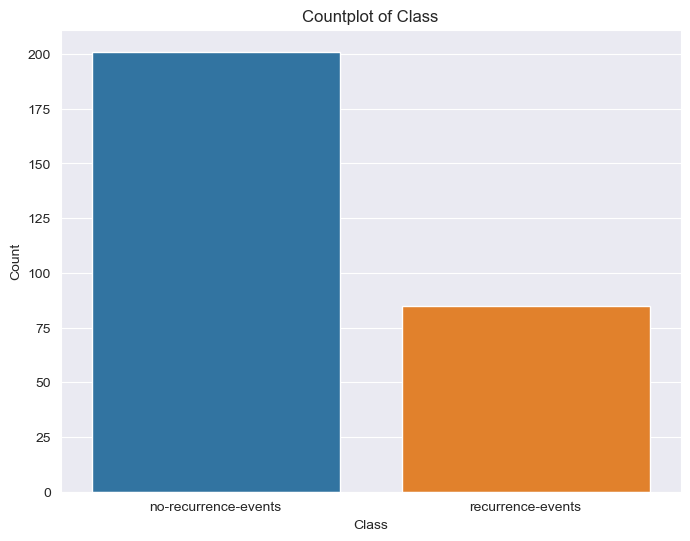

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

# Class countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=bc['class'])
plt.title("Countplot of Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#### The plot shows that there are less reccurance events than there are no reccurance events. 

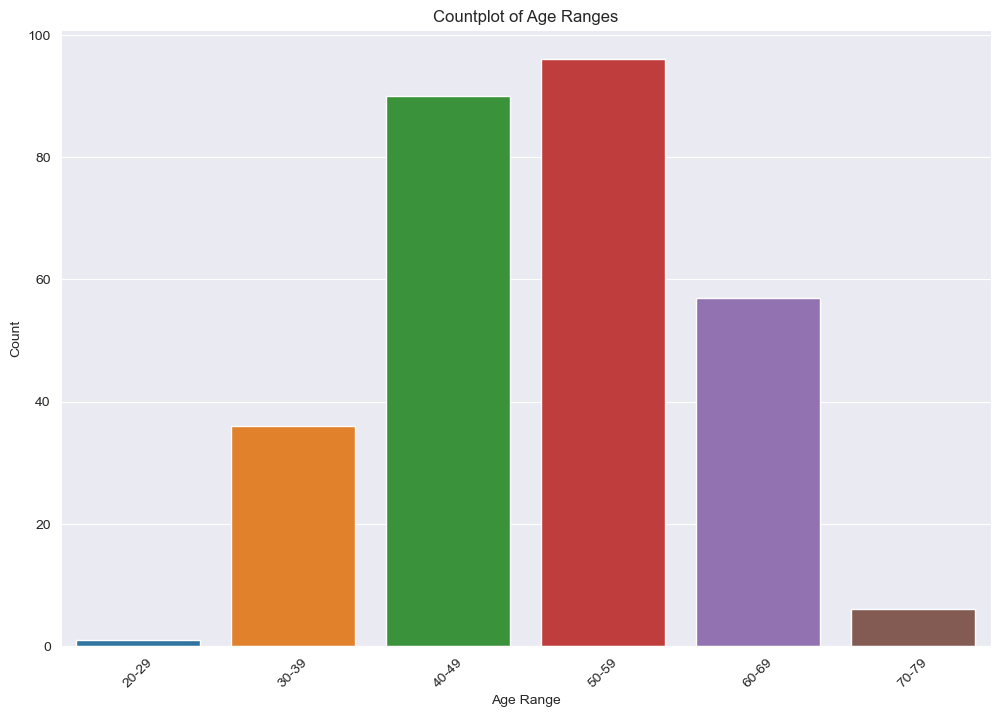

In [8]:
# Age countplot
plt.figure(figsize=(12, 8))
age_order = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
sns.countplot(x=bc['age'], order=age_order)
plt.title("Countplot of Age Ranges")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### The age groups that are most affected by breast cancer are 40-49 and 50-59. The number of cases decreseses for categories of age groups away from 40-49 and 50-59.

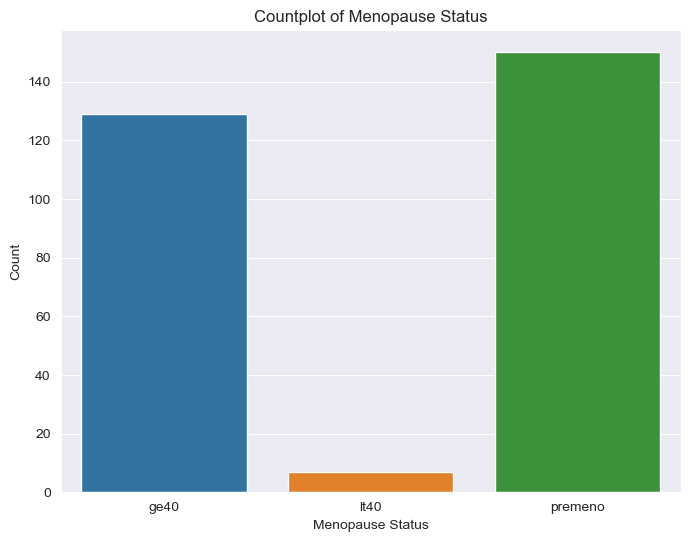

In [9]:
# Menopause status countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=bc['menopause'])
plt.title("Countplot of Menopause Status")
plt.xlabel("Menopause Status")
plt.ylabel("Count")
plt.show()

#### The most common menopause statuses are ge40 and premeno, while the lt40 is far less common. 

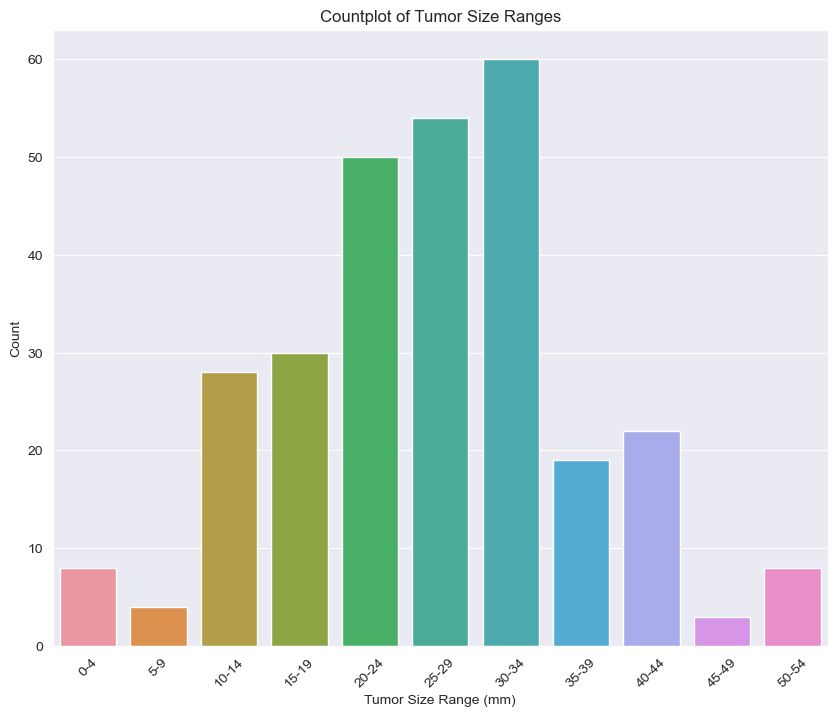

In [10]:
# Tumor size range countplot
# Ensure 'category_order' matches the unique values in your 'tumor-size' column accurately
category_order = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54']
plt.figure(figsize=(10, 8))
sns.countplot(x=bc['tumor-size'], order=category_order)
plt.title("Countplot of Tumor Size Ranges")
plt.xlabel("Tumor Size Range (mm)")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.show()

#### the tumor sizes that are more frequently between the ranges 20-24, 25-29, and 30-34. The number of cases decreseses for ranges furthest away from 20-24, 25-29, and 30-34 except 0-4 and 5-9.

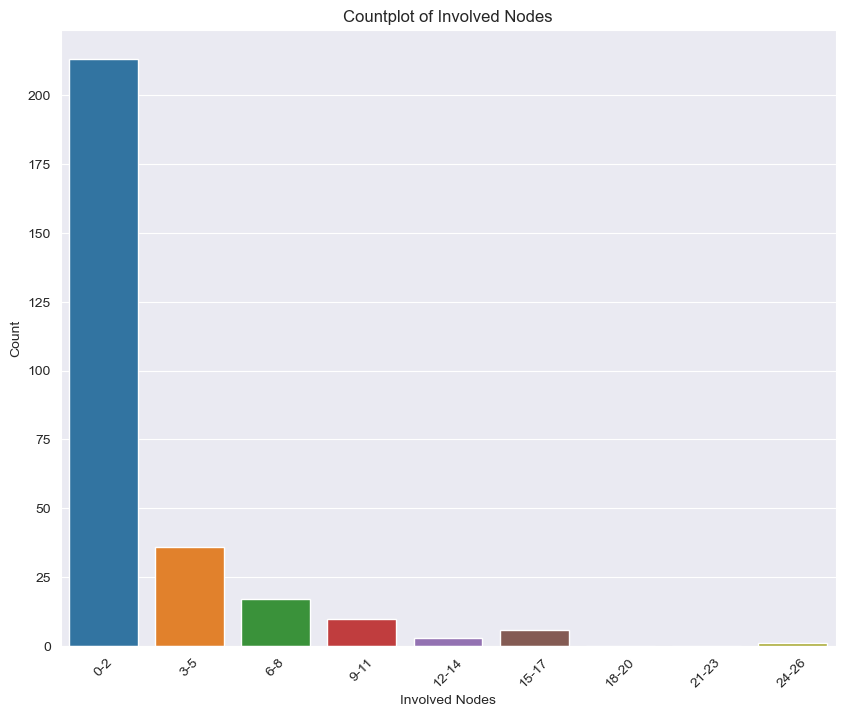

In [11]:
# Inv-nodes countplot
category_order = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23','24-26']
plt.figure(figsize=(10, 8))
sns.countplot(x=bc['inv-nodes'], order=category_order)
plt.title("Countplot of Involved Nodes")
plt.xlabel("Involved Nodes")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### The vast majority of breast cancer cases have 0-2 nodes, and the amount of cases for each node range decreases as the ranges increase. There is an outlier of a case with 24-26 nodes.

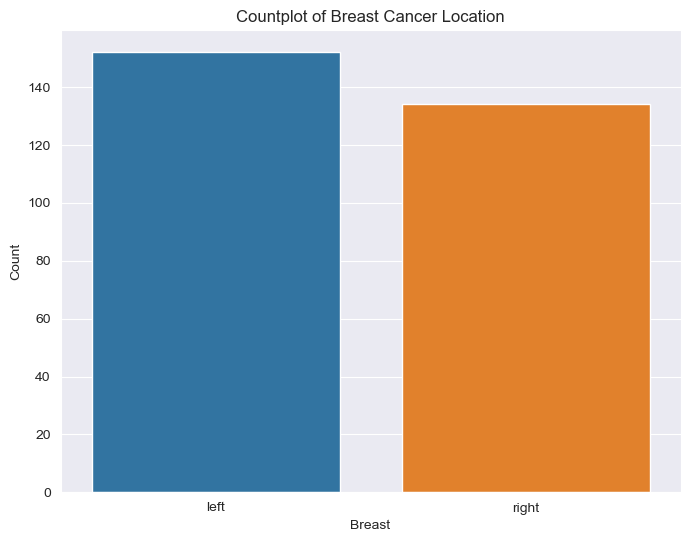

In [12]:
# Breast cancer location countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=bc['breast'])
plt.title("Countplot of Breast Cancer Location")
plt.xlabel("Breast")
plt.ylabel("Count")
plt.show()

#### There are more cases of breast cancer on the left breast but the amount of cases on left and right is about the same.

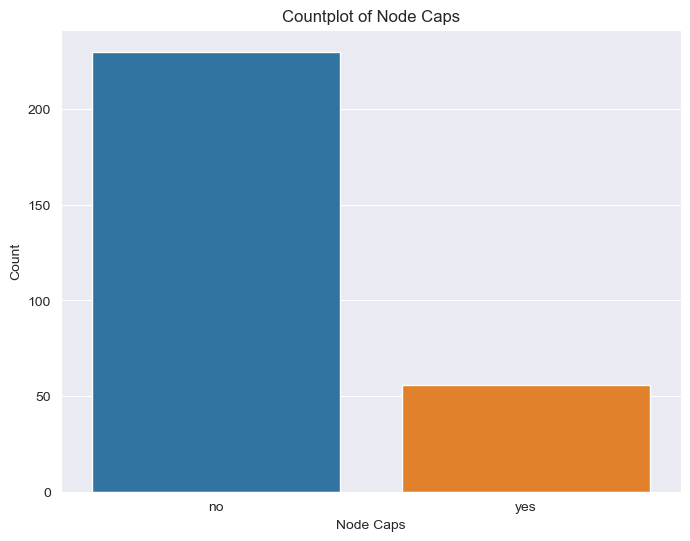

In [13]:
# Node-caps countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=bc['node-caps'])
plt.title("Countplot of Node Caps")
plt.xlabel("Node Caps")
plt.ylabel("Count")
plt.show()

#### I'm not sure what node caps are but there are significantly more cases with no than there is yes.

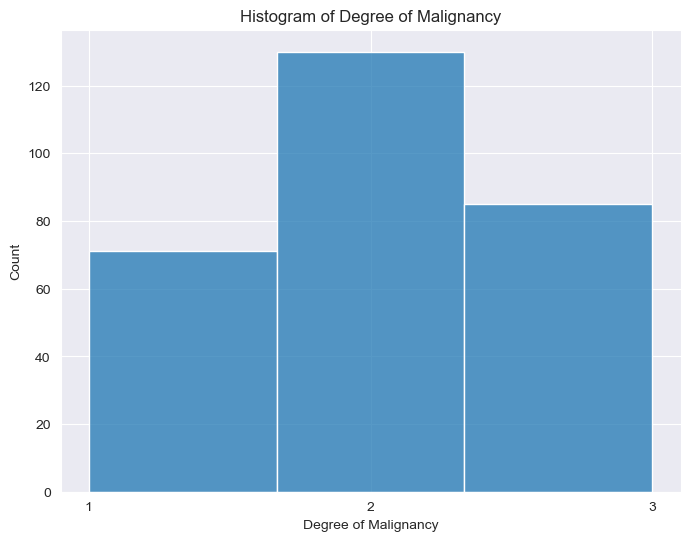

In [14]:
# Deg-malig (Degree of Malignancy) histogram
plt.figure(figsize=(8, 6))
sns.histplot(bc['deg-malig'], bins=3, kde=False)
plt.title("Histogram of Degree of Malignancy")
plt.xlabel("Degree of Malignancy")
plt.ylabel("Count")
plt.xticks([1, 2, 3])  
plt.show()

#### The degree of malignancy is most commonly 2, but not by much. Both degrees of 1 and 3 occur enough that they are statistically significant and not outliers

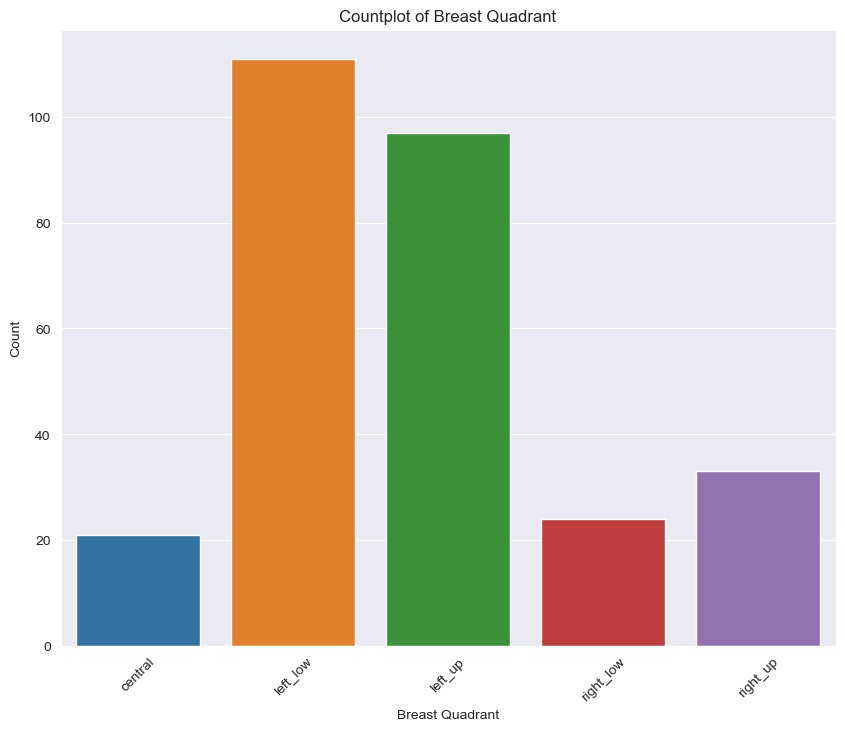

In [15]:
# Breast-quad countplot
plt.figure(figsize=(10, 8))
sns.countplot(x=bc['breast-quad'])
plt.title("Countplot of Breast Quadrant")
plt.xlabel("Breast Quadrant")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.show()

#### It seems breast cancer is found significantly more frequently in the left_low and left_up quadrants than in other quadrants.

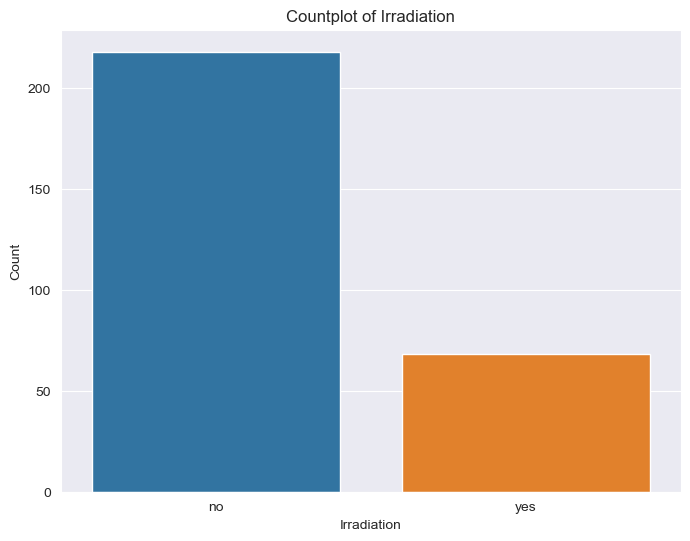

In [16]:
# Irradiat countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=bc['irradiat'])
plt.title("Countplot of Irradiation")
plt.xlabel("Irradiation")
plt.ylabel("Count")
plt.show()

#### There is more frequently no irrredation

### Perform one-hot encoding on categorical variables (1 point)

In [17]:
bc = pd.get_dummies(bc, columns=["class", "menopause", "age", "tumor-size", "inv-nodes", "node-caps", "breast", "breast-quad", "irradiat"], drop_first=True)
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   deg-malig                286 non-null    int64
 1   class_recurrence-events  286 non-null    uint8
 2   menopause_lt40           286 non-null    uint8
 3   menopause_premeno        286 non-null    uint8
 4   age_30-39                286 non-null    uint8
 5   age_40-49                286 non-null    uint8
 6   age_50-59                286 non-null    uint8
 7   age_60-69                286 non-null    uint8
 8   age_70-79                286 non-null    uint8
 9   tumor-size_10-14         286 non-null    uint8
 10  tumor-size_15-19         286 non-null    uint8
 11  tumor-size_20-24         286 non-null    uint8
 12  tumor-size_25-29         286 non-null    uint8
 13  tumor-size_30-34         286 non-null    uint8
 14  tumor-size_35-39         286 non-null    uint8
 15  tumor-

## PART 02

### Split the data into training and test datasets. Make sure your split is reproducible and that it maintains roughly the proportion of each class of dependent variable. (1 point)

In [18]:
from sklearn.model_selection import train_test_split

X = bc.drop('class_recurrence-events', axis=1)
y = bc['class_recurrence-events']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Perform classification using at least 3 of the supervised learning techniques. When appropriate, use search the hyperparameter space for an optimal hyperparameter setting. (6 points)

### K-Nearest Neighbor Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
# Check the accuracy on the test data
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy_test=accuracy_score(y_test, knn.predict(X_test))
print('Accuracy of knn on test data is : {:.2}'.format(accuracy_test))

# Check accuracy on the training data
accuracy_train=accuracy_score(y_train, knn.predict(X_train))
print('Accuracy of knn on train data is : {:.2}'.format(accuracy_train))

Accuracy of knn on test data is : 0.73
Accuracy of knn on train data is : 0.81


In [21]:
knn_search_accuracy = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 100)}

# Perform Grid Search with Cross-Validation
from sklearn.model_selection import GridSearchCV
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [24]:
#Improving Recall Through GridSearchCV
knn_search_recall = KNeighborsClassifier()
# specify the recall function to use when scoring
knn_gscv2 = GridSearchCV(knn_search_recall, param_grid, cv=5, scoring="recall")
knn_gscv2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='recall')

In [25]:
print("hyperparameter values for the best model: ", knn_gscv2.best_params_)
best_recall = knn_gscv2.best_estimator_
print("best recall: ", best_recall)

# the list of models we want to test
models = [knn, best_knn, best_recall]
for m in models:
    # Recall
    # on test data
    recall_test=recall_score(y_test, m.predict(X_test))
    print(f'Recall of {m} on test data is : {recall_test}')
    # on training data
    recall_train=recall_score(y_train, m.predict(X_train))
    print(f'Recall of {m} on train data is : {recall_train}')

hyperparameter values for the best model:  {'n_neighbors': 1}
best recall:  KNeighborsClassifier(n_neighbors=1)
Recall of KNeighborsClassifier(n_neighbors=3) on test data is : 0.44
Recall of KNeighborsClassifier(n_neighbors=3) on train data is : 0.45
Recall of KNeighborsClassifier(n_neighbors=7) on test data is : 0.36
Recall of KNeighborsClassifier(n_neighbors=7) on train data is : 0.21666666666666667
Recall of KNeighborsClassifier(n_neighbors=1) on test data is : 0.56
Recall of KNeighborsClassifier(n_neighbors=1) on train data is : 0.95


### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

model_rf = RandomForestClassifier()
param_grid = {
   "n_estimators": np.arange(start=10, stop=100, step=2),
   "max_depth": np.arange(start=2, stop=20),
   "min_samples_leaf": np.arange(start=1, stop=5),
   "class_weight": [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}],
}

gscv = GridSearchCV(model_rf, param_grid, cv=5, n_jobs=8, scoring="recall", )
gscv.fit(X_train, y_train)
gscv.best_params_

{'class_weight': {0: 0.1, 1: 0.9},
 'max_depth': 2,
 'min_samples_leaf': 1,
 'n_estimators': 14}

### Decision Trees

In [31]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

[Text(0.7229077253218884, 0.9705882352941176, 'x[24] <= 0.5\ngini = 0.416\nsamples = 200\nvalue = [141, 59]'),
 Text(0.5745708154506438, 0.9117647058823529, 'x[8] <= 0.5\ngini = 0.34\nsamples = 161\nvalue = [126, 35]'),
 Text(0.5574034334763949, 0.8529411764705882, 'x[21] <= 0.5\ngini = 0.375\nsamples = 140\nvalue = [105, 35]'),
 Text(0.4409871244635193, 0.7941176470588235, 'x[1] <= 0.5\ngini = 0.349\nsamples = 129\nvalue = [100, 29]'),
 Text(0.2939914163090129, 0.7352941176470589, 'x[0] <= 1.5\ngini = 0.337\nsamples = 126\nvalue = [99, 27]'),
 Text(0.05150214592274678, 0.6764705882352942, 'x[2] <= 0.5\ngini = 0.198\nsamples = 36\nvalue = [32, 4]'),
 Text(0.034334763948497854, 0.6176470588235294, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.06866952789699571, 0.6176470588235294, 'x[26] <= 0.5\ngini = 0.346\nsamples = 18\nvalue = [14, 4]'),
 Text(0.034334763948497854, 0.5588235294117647, 'x[5] <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.017167381974248927, 0.5,

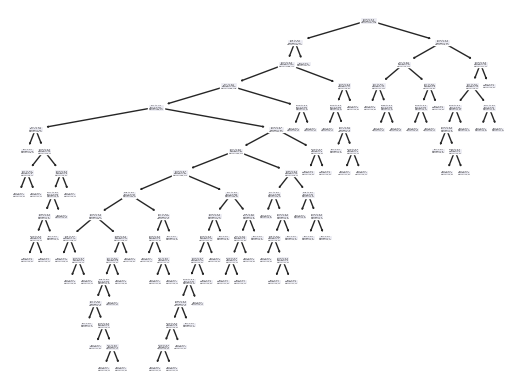

In [32]:
from sklearn import tree
tree.plot_tree(model_dt)

### Print report showing accuracy, recall, precision and f1-score for each classification model. Which metric is most important for this problem? (You will explain your answer in the report in Part 3). ( 2 points)

### K-Nearest Neighbor Classifier

In [34]:
#exctratc best parameters and estimator
print("optimal k value: ", knn_gscv.best_params_)
best_knn = knn_gscv.best_estimator_
print("best estimator: ", best_knn)

optimal k value:  {'n_neighbors': 7}
best estimator:  KNeighborsClassifier(n_neighbors=7)


In [35]:
# Check the accuracy on the test data
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy_test=accuracy_score(y_test, best_knn.predict(X_test))
print(f"Accuracy on the test data set for the model produced with the optimal k is: {accuracy_test}")

# Check accuracy on the training data
accuracy_train=accuracy_score(y_train, best_knn.predict(X_train))
print('Accuracy of on train data for the model produced with the optimal k is: {:.2}'.format(accuracy_train))

y_pred = best_knn.predict(X_test)
print(f"Test Recall: {recall_score(y_test, y_pred)}")
print(f"Test Precision: {precision_score(y_test, y_pred)}")
print(f"f1_score: {f1_score(y_test, y_pred)}")

Accuracy on the test data set for the model produced with the optimal k is: 0.7790697674418605
Accuracy of on train data for the model produced with the optimal k is: 0.74
Test Recall: 0.34615384615384615
Test Precision: 0.8181818181818182
f1_score: 0.4864864864864865


### Random Forest Classifier

In [60]:
from sklearn.metrics import classification_report

# Print performance on TEST data
print("Performance on TEST\n*******************")
print(classification_report(y_test, model.predict(X_test), zero_division=1.0))

# Print performance on TRAIN data
print("Performance on TRAIN\n********************")
print(classification_report(y_train, model.predict(X_train), zero_division=1.0))

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        60
           1       0.45      0.35      0.39        26

    accuracy                           0.67        86
   macro avg       0.60      0.58      0.58        86
weighted avg       0.65      0.67      0.66        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       141
           1       0.84      0.81      0.83        59

    accuracy                           0.90       200
   macro avg       0.88      0.87      0.88       200
weighted avg       0.90      0.90      0.90       200



### Decision Trees

In [37]:
from sklearn.metrics import classification_report
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model_dt.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model_dt.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        60
           1       0.37      0.27      0.31        26

    accuracy                           0.64        86
   macro avg       0.54      0.53      0.53        86
weighted avg       0.61      0.64      0.62        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       141
           1       1.00      0.90      0.95        59

    accuracy                           0.97       200
   macro avg       0.98      0.95      0.96       200
weighted avg       0.97      0.97      0.97       200



### Bonus: (2 points) Find and implement a method that improves the model performance on the most important metric.

#### Improving Recall via the Decision Threshold

In [41]:
# call the predict method using the first model (knn) on the first 10 samples
knn.predict(X_test.iloc[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [42]:
# call the predict_proba method on the same samples:
knn.predict_proba(X_test.iloc[0:10])

array([[0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ]])

In [43]:
def modified_predict(y_probs, threshold):
    """
    Returns modified predictions for a collection of raw probabilities, `y_probs`
    given a decision threshold, `threshold`.
    """
    result = []
    # iterate over the raw probabilities
    for y in y_probs:
        # compare each one to the threshold
        if y >= threshold:
            result.append(1)
        else:
            result.append(0)
    return result

In [44]:
y_probs = knn.predict_proba(X_test)[0:10,1]

In [45]:
modified_predict(y_probs, 0.3)

[1, 0, 0, 0, 0, 1, 1, 0, 1, 1]

In [46]:
modified_predict(y_probs, 0.8)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [47]:
def confusion_matrix_for_threshold(X, y, model, threshold):
    """
    Print a simple confusion matrix for the model, `model` on the data `X`, `y`
    for a given decision threshold, `0 \leq threshold \leq 1`.
    """

In [48]:
from sklearn.metrics import confusion_matrix

def confusion_matrix_for_threshold(X, y, model, threshold):
    # first, get the raw scores
    y_probs = model.predict_proba(X)[:,1]
    # then, get the modified labels
    y_modified_pred = modified_predict(y_probs, threshold)
    # print a simple confusion matrix as a pandas dataframe so that
    # we can label the rows and columns
    print(pd.DataFrame(confusion_matrix(y, y_modified_pred),
                    columns=['Predicted_False', 'Predicted_True'],
                    index=['Actual_False', 'Actual_True']))

In [49]:
confusion_matrix_for_threshold(X_test, y_test, knn, 0.5)

              Predicted_False  Predicted_True
Actual_False               56               4
Actual_True                15              11


In [50]:
confusion_matrix_for_threshold(X_test, y_test, knn, 0.3)

              Predicted_False  Predicted_True
Actual_False               37              23
Actual_True                 2              24


In [52]:
models = [knn, knn_gscv.best_estimator_, knn_gscv2.best_estimator_]
thresholds = [0.8, 0.5, 0.3]
for m in models:
    print(f"Model: {m}\n")
    for t in thresholds:
        print(f"threshold: {t}")
        confusion_matrix_for_threshold(X_test, y_test, m, t)

Model: KNeighborsClassifier(n_neighbors=3)

threshold: 0.8
              Predicted_False  Predicted_True
Actual_False               59               1
Actual_True                23               3
threshold: 0.5
              Predicted_False  Predicted_True
Actual_False               56               4
Actual_True                15              11
threshold: 0.3
              Predicted_False  Predicted_True
Actual_False               37              23
Actual_True                 2              24
Model: KNeighborsClassifier(n_neighbors=7)

threshold: 0.8
              Predicted_False  Predicted_True
Actual_False               60               0
Actual_True                25               1
threshold: 0.5
              Predicted_False  Predicted_True
Actual_False               58               2
Actual_True                17               9
threshold: 0.3
              Predicted_False  Predicted_True
Actual_False               52               8
Actual_True                12           

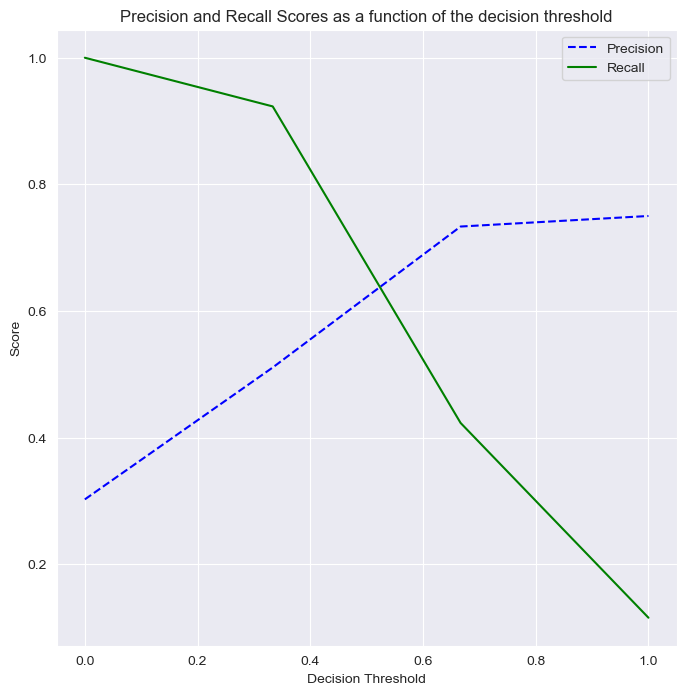

In [53]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

# generate the probabilities on the test set; here we could use any model
y_probs = knn.predict_proba(X_test)[0:,1]

# the precision_recall_curve function from sklearn returns three parameters
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)